# Classification Modeling

In [1]:
import classifiers as clf

import pickle

import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler

from imblearn.over_sampling  import SMOTE
from imblearn.over_sampling  import SMOTENC

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
species.head()

,Scientific Name,Common Name,Group,Federal Listing Status,VIP,State,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,Accipiter gentilis,Northern goshawk,Birds,Not Listed,V,AL,32413,22877
1,Acipenser fulvescens,Lake sturgeon,Fishes,Not Listed,V,AL,32413,22877
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,Threatened,V,AL,32413,22877
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,Not Listed,I,AL,32413,22877
4,Agrimonia incisa,Incised groovebur,Flowering Plants,Not Listed,P,AL,32413,22877


### Set Target and Feature Variables

In [3]:
# Create target variables
y = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create target variables
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name', 'VIP', 'State', 'Group'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
0,32413,22877
1,32413,22877
2,32413,22877
3,32413,22877
4,32413,22877


### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_sets = pd.DataFrame({'Train':        y_train.value_counts(),
                          'Test':         y_test.value_counts(),
                          'Train Normal': y_train.value_counts() / y_train.count(),
                          'Test Normal':  y_test.value_counts()  / y_test.count()})

data_sets.loc['Total'] = data_sets.sum().astype(int)
data_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6939,1736,0.764460,0.764758
Endangered,1512,372,0.166575,0.163877
Threatened,626,162,0.068966,0.071366
Total,9077,2270,1.000000,1.000000


### Feature Scaling

In [5]:
X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
7653,30161,18966
11291,62140,11448
3945,36809,24768
9817,167188,62425
2185,99699,32618


In [6]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]   = scaler.transform(X_test[X_test.columns])

X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres)
7653,0.080829,0.145247
11291,0.168454,0.086621
3945,0.099045,0.190491
9817,0.456293,0.484143
2185,0.271368,0.251706


### Classification Model Hyper Parameter Grid Search

In [7]:
# define parameter grid search for all classifiers
classifiers = []

# dummy classifier
classifiers.append(
    clf.grid_search_dummy_classifier(dict(
        strategy=['most_frequent','stratified'])))

# logistic regression
classifiers.append(
    clf.grid_search_logistic_regression(dict(
        C=[1e-2,1e0,1e2,1e6,1e12],
        penalty=['l1', 'l2'],
        fit_intercept=[True, False],
        multi_class=['ovr'],
        solver=['liblinear'])))

# multinomial naive bayes classifer
classifiers.append(
    clf.grid_search_multinomial_nb(dict(
        alpha=[0.0,1.0],
        fit_prior=[True])))

# k nearest neighbors classifier
classifiers.append(
    clf.grid_search_k_neighbors_classifier(dict(
#        n_neighbors=[5,11],
#        weights=['uniform', 'distance'],
        algorithm=['ball_tree','kd_tree'],
        leaf_size=[100,200])))

# decision tree classifier
classifiers.append(
    clf.grid_search_decision_tree_classifier(dict(
        criterion=['gini','entropy'],
#        max_depth=[6,8],
#        min_samples_leaf=[20,50,100],
#        max_features=[20,30,40],
        min_impurity_decrease=[0.01,0.03,0.05])))

# random forest classifier
classifiers.append(
    clf.grid_search_random_forest_classifier(dict(
        n_estimators=[100,200,300],
#        max_depth=[2,3,4],
#        min_samples_leaf=[100,200],
#        max_features=[10,20],
        min_impurity_decrease=[0.01,0.03,0.05])))

# ada boost classifer
classifiers.append(
    clf.grid_search_ada_boost_classifier(dict(
        n_estimators=[100,200,300],
        learning_rate=[0.5,1.0])))

### Baseline Classification Models

In [8]:
# run baseline dataset
baseline = clf.fit_predict_measure('Baseline', X_train, X_test, y_train, y_test, y_labels, classifiers)
baseline

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1972s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    5.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0772s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1765s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0706s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    9.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.5s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   31.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.3s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Baseline,Dummy,{'strategy': 'most_frequent'},Train,0.764460,0.584399,0.764460,0.662411,NaN
1,Baseline,Dummy,{'strategy': 'stratified'},Train,0.613749,0.618513,0.616173,0.614045,NaN
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
3,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.764460,0.584399,0.764460,0.662411,NaN
4,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.764460,0.584399,0.764460,0.662411,NaN
5,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.758511,0.593476,0.758511,0.660516,NaN
6,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.764460,0.584399,0.764460,0.662411,NaN
7,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.764460,0.584399,0.764460,0.662411,NaN
8,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.764460,0.584399,0.764460,0.662411,NaN
9,Baseline,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.764460,0.584399,0.764460,0.662411,NaN


In [9]:
# statistics of baseline classifiers (test and training sets)
baseline.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.759244,0.587898,0.759288,0.661552
std,0.021367,0.009628,0.021067,0.006494
min,0.613749,0.584399,0.616173,0.614045
25%,0.764460,0.584399,0.764460,0.662411
50%,0.764460,0.584399,0.764460,0.662411
75%,0.764460,0.584399,0.764460,0.662411
max,0.764758,0.618513,0.764758,0.665667


In [10]:
# best estimators of baseline dataset
baseline_test = baseline[baseline['Split'] == 'Test']
baseline_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
31,Baseline,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.746696,0.617177,0.746696,0.665667,"[[1680, 0, 56], [151, 0, 11], [357, 0, 15]]"
2,Baseline,Dummy,{'strategy': 'most_frequent'},Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
23,Baseline,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
26,Baseline,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
38,Baseline,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
48,Baseline,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"
55,Baseline,Ada Boost,"{'learning_rate': 0.5, 'n_estimators': 100}",Test,0.764758,0.584854,0.764758,0.662815,"[[1736, 0, 0], [162, 0, 0], [372, 0, 0]]"


### Handling Class Imbalance with SMOTENC Oversampling

In [11]:
# balance classes with SMOTE oversampling
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

# balanced data set statistics
smote_sets = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                           'Test Normal':  y_test.value_counts()        / y_test.count()})

smote_sets.loc['Total'] = smote_sets.sum().astype(int)
smote_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6939,1736,0.333333,0.764758
Endangered,6939,372,0.333333,0.163877
Threatened,6939,162,0.333333,0.071366
Total,20817,2270,1.000000,1.000000


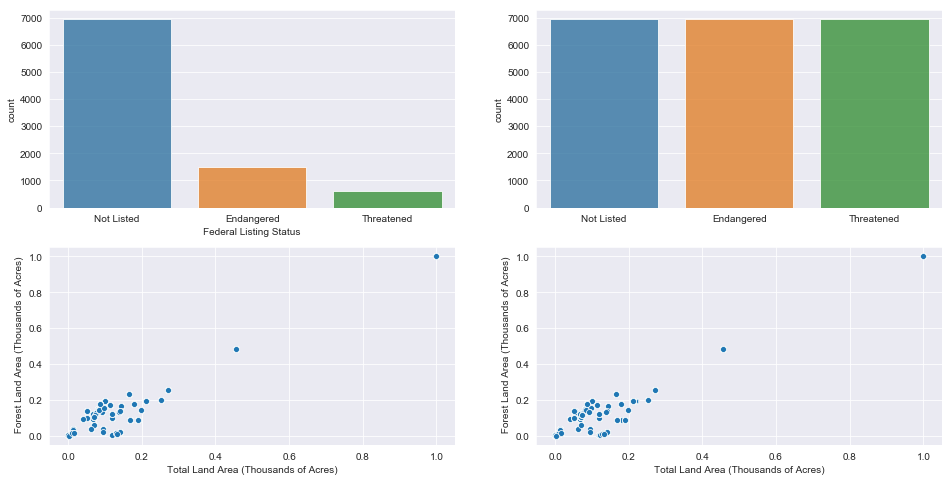

In [12]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])

### Balanced Classification Models

In [13]:
# run balanced dataset
balanced = clf.fit_predict_measure('Balanced', X_train_smote, X_test, y_train_smote, y_test, y_labels, classifiers)
balanced

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1966s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1786s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1536s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   18.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.2s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.3min remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Balanced,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,Balanced,Dummy,{'strategy': 'stratified'},Train,0.338762,0.333144,0.333670,0.334150,NaN
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.309692,0.609073,0.309692,0.375733,"[[534, 571, 631], [55, 48, 59], [115, 136, 121]]"
3,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.366047,0.243448,0.366047,0.289320,NaN
4,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.399145,0.404937,0.399145,0.362017,NaN
5,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.331316,0.145512,0.331316,0.167669,NaN
6,Balanced,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.333333,0.111111,0.333333,0.166667,NaN
7,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.405006,0.404439,0.405006,0.393515,NaN
8,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.405054,0.404630,0.405054,0.393509,NaN
9,Balanced,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.377048,0.252816,0.377048,0.301646,NaN


In [14]:
# statistics of balanced classifiers (test and training sets)
balanced.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.380877,0.332489,0.380786,0.322949
std,0.055155,0.170577,0.055230,0.109708
min,0.114537,0.055111,0.114537,0.058950
25%,0.337405,0.248068,0.333586,0.295204
50%,0.377048,0.322679,0.377048,0.301646
75%,0.407888,0.406448,0.407888,0.399150
max,0.471366,0.704959,0.471366,0.507660


In [15]:
# best estimators of balanced dataset
balanced_test = balanced[balanced['Split'] == 'Test']
balanced_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
26,Balanced,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.471366,0.650169,0.471366,0.507660,"[[827, 0, 909], [67, 0, 95], [129, 0, 243]]"
38,Balanced,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.428194,0.704959,0.428194,0.503481,"[[764, 774, 198], [53, 107, 2], [92, 179, 101]]"
23,Balanced,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.415859,0.686188,0.415859,0.469860,"[[671, 383, 682], [40, 55, 67], [89, 65, 218]]"
55,Balanced,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.392070,0.690880,0.392070,0.462166,"[[652, 756, 328], [49, 93, 20], [83, 144, 145]]"
31,Balanced,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.368282,0.658614,0.368282,0.420609,"[[574, 509, 653], [47, 64, 51], [92, 82, 198]]"
2,Balanced,Dummy,{'strategy': 'stratified'},Test,0.309692,0.609073,0.309692,0.375733,"[[534, 571, 631], [55, 48, 59], [115, 136, 121]]"
48,Balanced,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.114537,0.055111,0.114537,0.058950,"[[0, 1496, 240], [0, 152, 10], [0, 264, 108]]"


### Data Loading

In [16]:
baseline.to_pickle('../Data/baseline.pkl')
balanced.to_pickle('../Data/balanced.pkl')
pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')